# GraphPlot tutorial

**Tutorial in Working progress**

If you have read the previous tutorials you can run this notebook and have fun playing with the widget. If not... play and see what happens!

This is a basic tutorial on how to use the shaolin GraphPlot for interactive visualization of graphs.

### Imports and setup of sample data

In [1]:
#wide screen hack, great for making big plots and have more room for the control panels
from IPython.core.display import HTML
html ='''<style>
.container { width:98% !important; }
.input{ width:40% !important; }
.text_cell{ width:40% !important;
            font-size: 16px;}
.title {align:center !important;}
</style>'''
HTML(html)

In [2]:
import sys
path ="/home/sergio/github/shaolin-master"
sys.path.append(path)

In [3]:
from IPython.display import Image #this is for displaying the widgets in the web version of the notebook
import pandas as pd
from shaolin.benders.graph import GraphPlot
from shaolin.wranglers.graph import GraphCalculator

Loading BokehJS ...

In [4]:
node_metrics = pd.read_hdf('gplot_data/sample_node_metrics.h5')
matrix_panel = pd.read_hdf('gplot_data/sample_matrix_panel.h5')

In [5]:
gc = GraphCalculator(node_metrics=node_metrics,matrix_panel=matrix_panel)

## Plot initialization

To start plotting a graph you only need to instantiate a GraphPlot holding the information we want to visualize. Al the managemen can be done as usual using the *widget* attribute.

**Alpha version disclaimer**:

- As the GraphCalculator still doesn't handle the *node_metrics* it is necessary to merge them with the *node* Dataframe by hand in order to handle the tooltip info propperly. This will soon be corrected.

In [6]:
gc.node_metrics = gc.node_metrics.T.combine_first(gc.node) #Alpha version hack

In [7]:
gp = GraphPlot(gc)

## Main interface 

This interface combines both the same type of widgets as the ScatterPlot and the GraphCalculator. In order to display the widgets click on the toggle buttons as in the ScatterPlot plot. 

### Plot structure

When using this type of plot the following considerations must be taken into account:

#### Nodes:

- The nodes are represented as the big markers in the plot. Its attributes can be changed the same was as a ScatterPlot Marker.

- Each node has a tooltip that will be displayed on Hover.

- There is no current support for label text customization yet.

- If you use the WebGL flag for the plot the node markers will be drawn on top of the labels (This is due to Bokeh features)

#### Edges

- Each edge is represented by a line segment connecting two nodes and scatter plot marker sittuated at the center of the segment. 

- The segment propperties will be set by accessing line propperties in the mapping widget.

- The center marker properties will be set with the line and fill properties of the mapping widget. This means that the line properties will be the same for both the segment and the center marker. 

- The Edge tooltip will be displayed by hovering over teh center marker. As segments cannot have hover tooltips in Bokeh this is not a Shaolin limitation. 

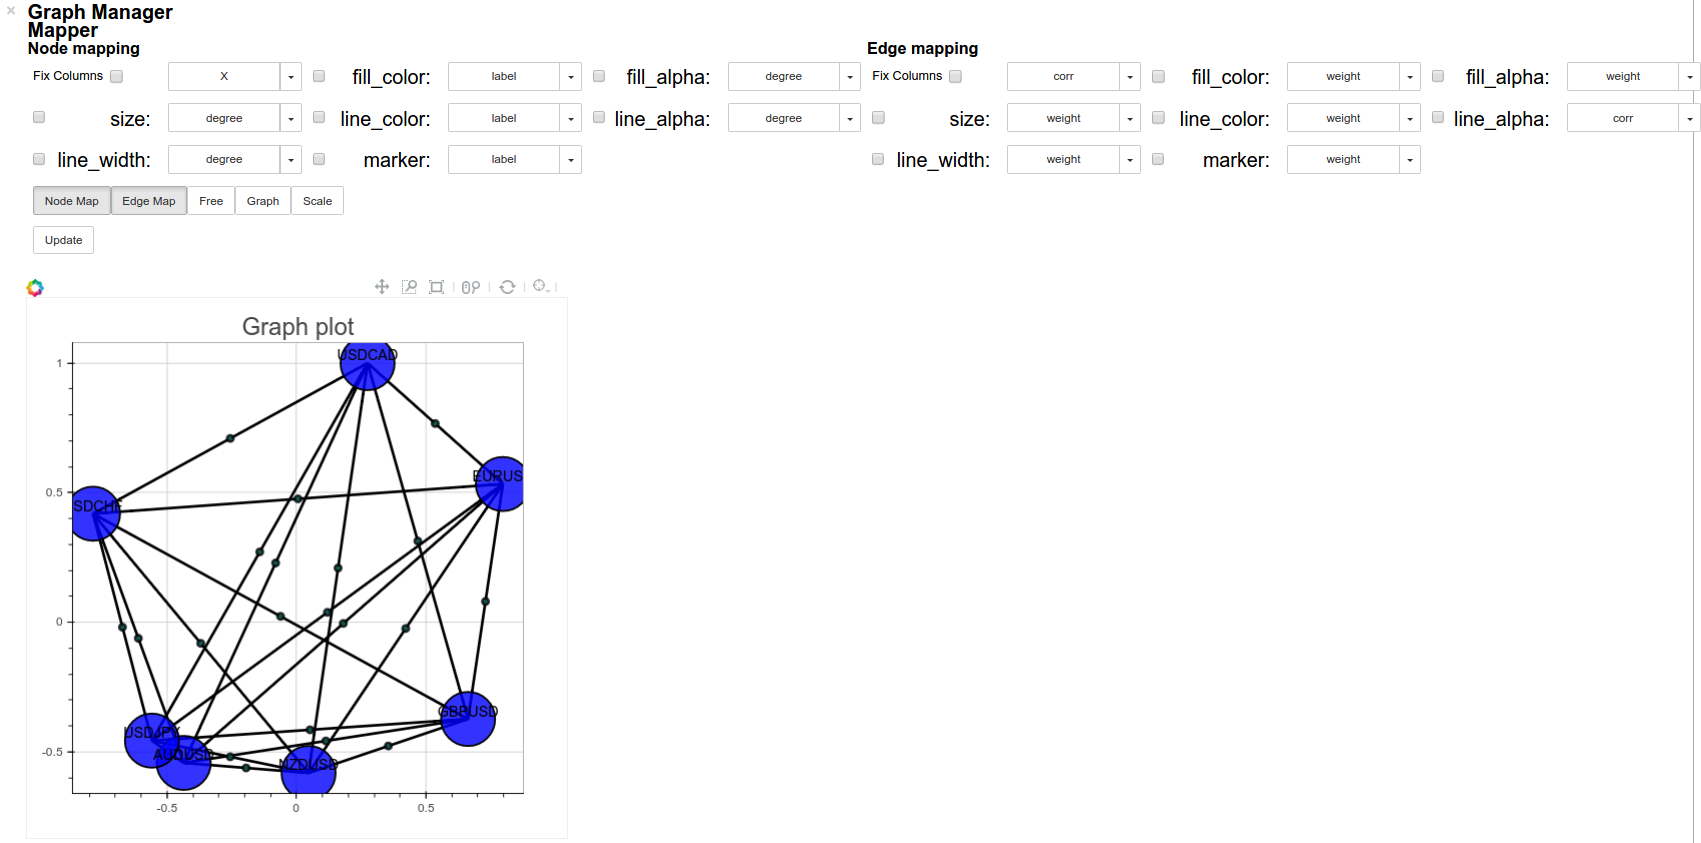

In [10]:
Image(filename='gplot_data/widget.png')
#gp.widget

## A practical example: Forex time series analysis

in order to show some of the GraphPlot capabilities we will conduct an analysis in order to gain insight on how the foreign exchange market has evolved during a period of time. 

Aur goal is gaining insight on the behaviour of the different curencies and on how their correlation matrix is structured. 

## Selecting an appropiate layout

Our fist step will be selecting a suitable layout for displaying our graph:

1. Hide the mappers and display the graph param manager widgets.
2. Select the circular layout in the graph layout widget.
3. Select correlation as a target attribute.
4. Select distance as a matrix transformation. 
5. Select full matrix as a graph Type.

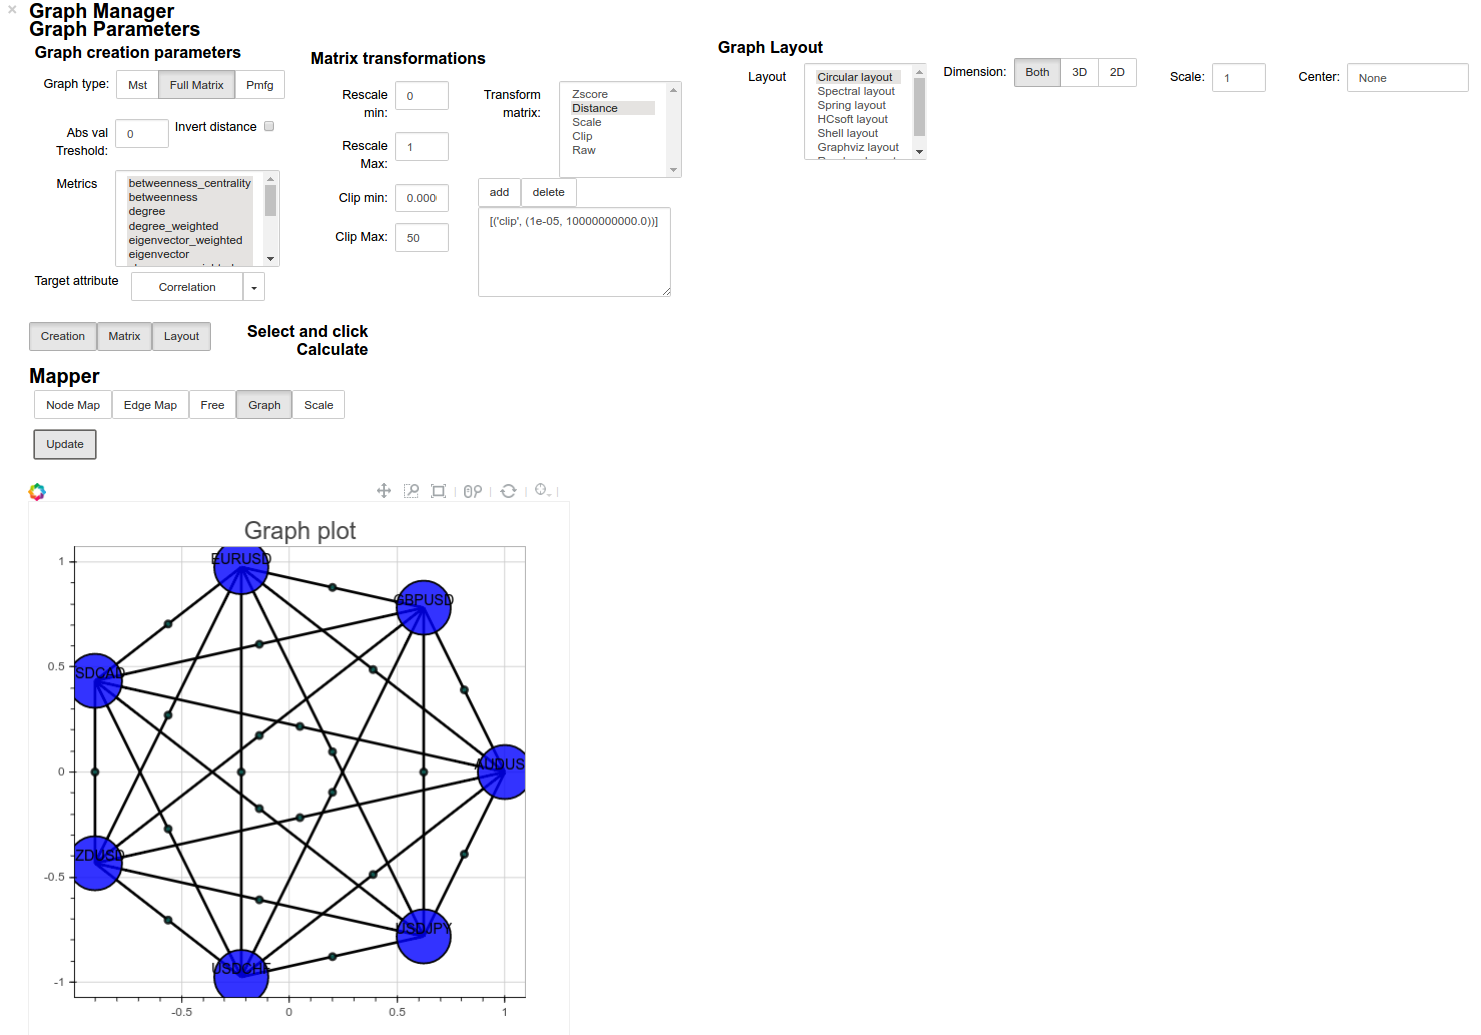

In [22]:
Image(filename='gplot_data/layout.png') 
#gp.widget

## Node display customization 

In this example we will colour each node according to its total returns during the evaluated period of time and its size as a function of its volatility. Follow the following steps in order to do this:

1. Hide the graph widget and open the node map widget.
2. Change the fill_color value of the node mapper to total_rets.
3. Open the free params selector.
4. Change the node fill_colormap to RdYlGn and hide the menu again.
5. Activate the fill_color checkbox.
6. Open the scale parameters widget.
7. Change the node scale *size* parameter to Max=70 and min=30.
8. Hide the Scale widget.
9. Change the Node mapping *size* attribute to std_rets.
10. Activate the node mapper *size* checkbox.

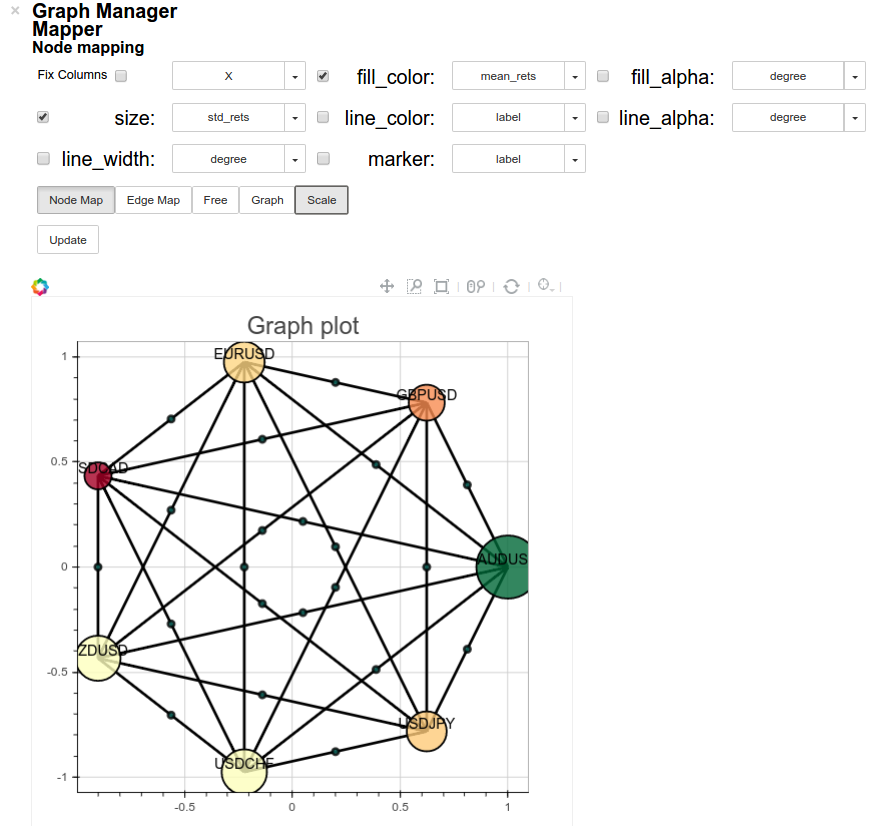

In [21]:
Image(filename='gplot_data/node_display.png') 
#gp.widget

## Edge display customization.

Now it's turn to configure the edge display. We want information about the structure of the correlation, so we will start emphatising the information it contains.

This are the steps for conducting the analysis:

1. Hide the node map and display the edge map.
2. Click on the Fix Columns checkbox in order to set all the map values to "corr".
3. Open the Free params menu and change the edge line_colormap and fill_colormap to "coolwarm".
4. Change the edge scale size to min=7, max=21.
5. Change the line_width scale to min~1.8, max~5.1
6. Hide all the widgets but the edge map widget. 
7. Activate the fill_color, size, line_width and line_color checkbox.


You should now hace something like this:

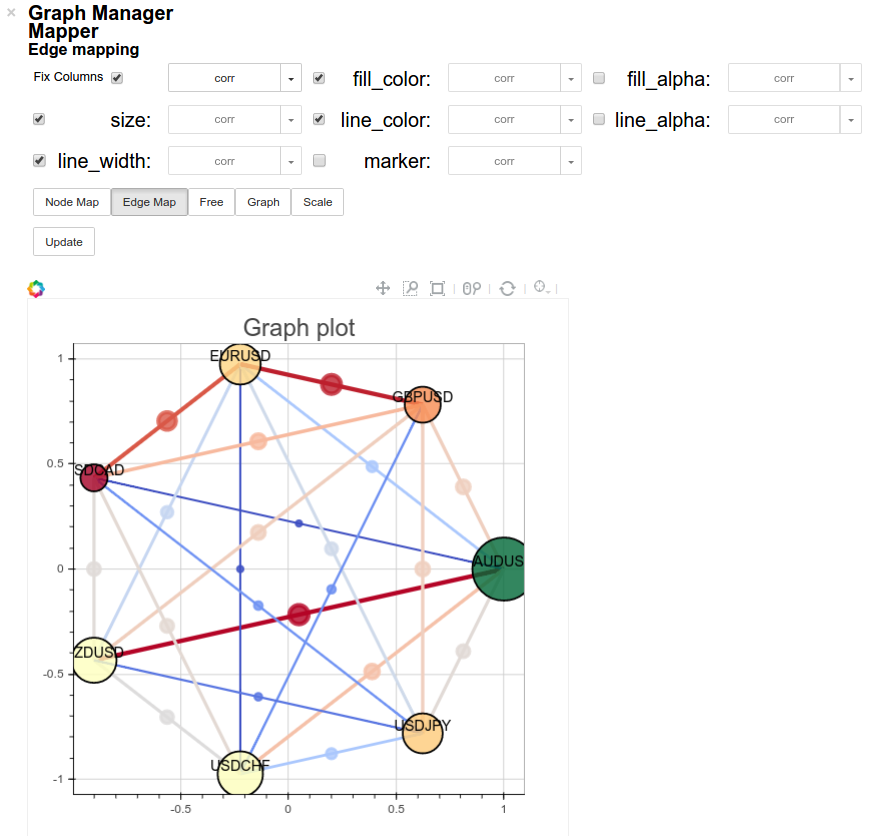

In [32]:
Image(filename='gplot_data/edge_display.png') 
#gp.widget

## Tooltip customization

Now we have already set all the visual attributes we will customize the data displayed on both tooltips. In order to do so we will activate the free params widgets, which also includes the tooltip widgets. 

You can select wich columns will be displayed on each tooltip. Select the columns that will be displayed and click on update. You can select multiple columns using the "shift" and alt "keys"

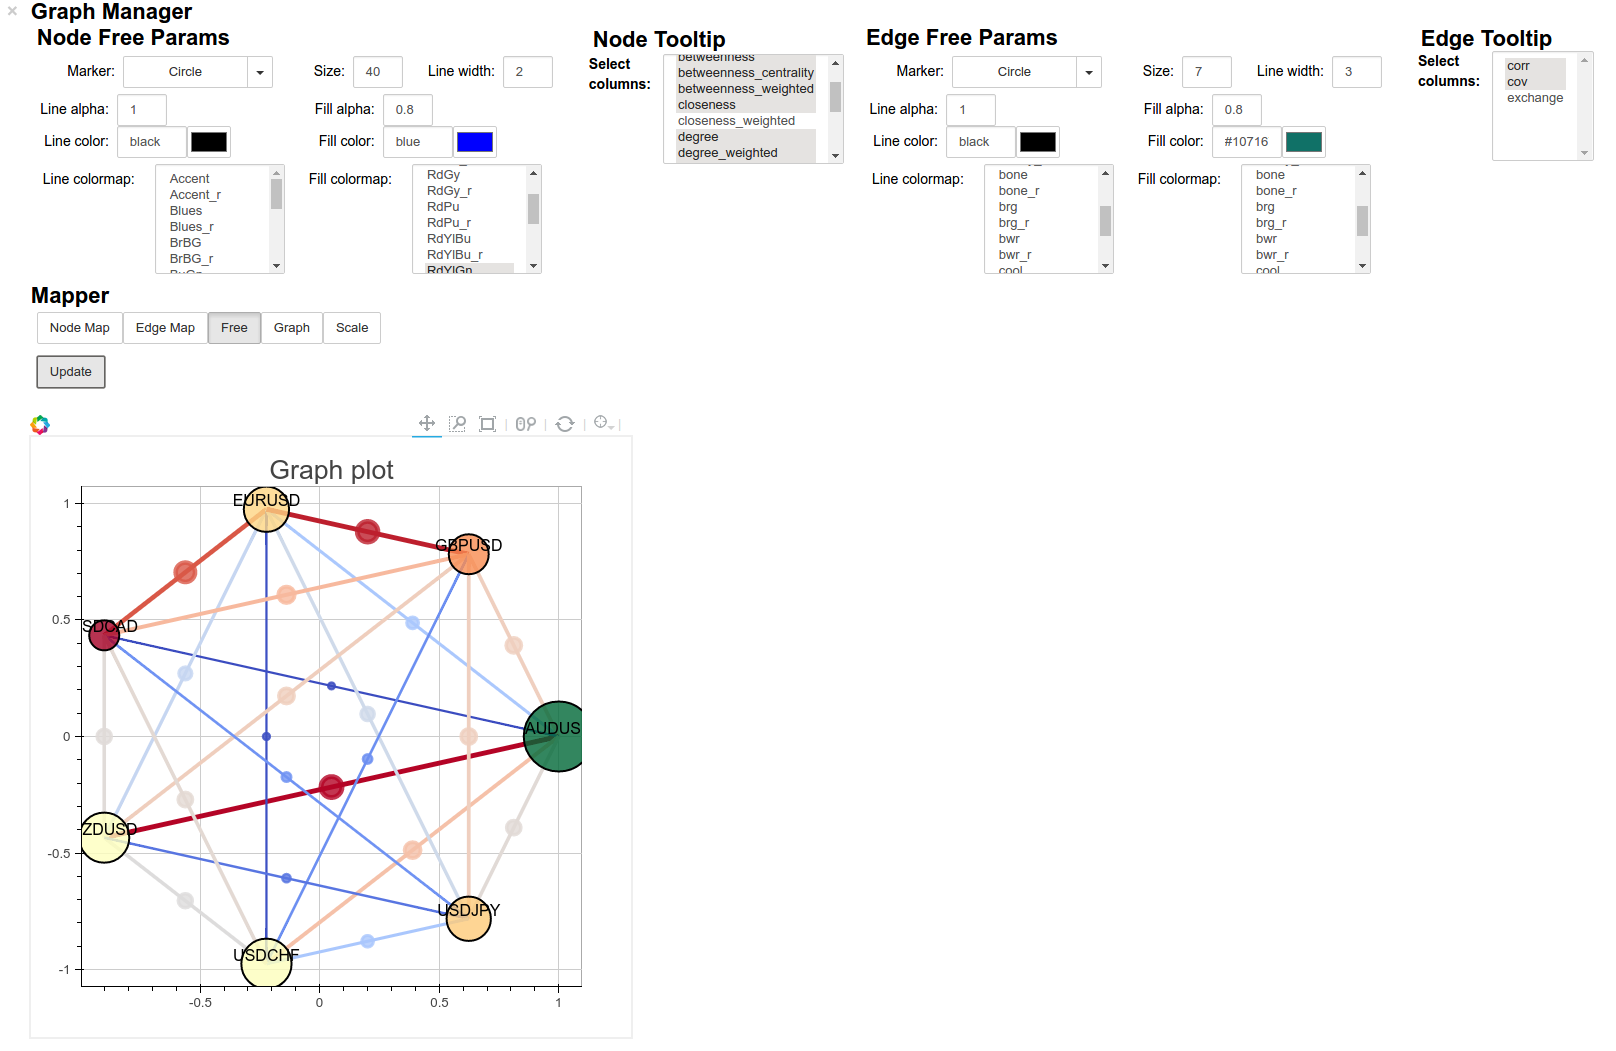

In [20]:
Image(filename='gplot_data/tooltip.png') 
#gp.widget

## Zooming and rescaling the plot

As the graph plot is just a custom bokeh plot it is possible to rescale and zoom as usual. Now all the tools are iadded to the plot. A custom control will be added in the future. 

Now we will rescale and zoom so all the labels con correctly be read.

## Saving and exporting the plot

This plot is compatible with all the options that bokeh offers for saving plots.

In this case we will persist the boke plot as a notebook html cell and show it as a standard bokeh plot with show. All the operations can be done by accessing the *plot* attribute of the GraphPlot.

In [28]:
from bokeh.plotting import show
show(gp.plot)

In [51]:
from bokeh.embed import notebook_div
gp.plot.title = 'Full Graph'
full_div = notebook_div(gp.plot)#output the plot as a jupyter cell

In [53]:
HTML(full_div)

## Going deeper into the correlation matrix structure

###  Planar Maximal Filtered graph  (PMFG)

PMFG is a filtering thechnique to extract information from the correlation matrix when converting it to a graph adjacency matrix. It is possible to change the full connected graph for a PMFG activating the option in the Graph parameters widget. We can use it for emphasising both the highest and lowest correlations.

### Filtering the highest correlations

In order to get a PMFG containing the highest correlations it is only necessary to click in the invert distance checkbox and select PMFG as a gaph type.

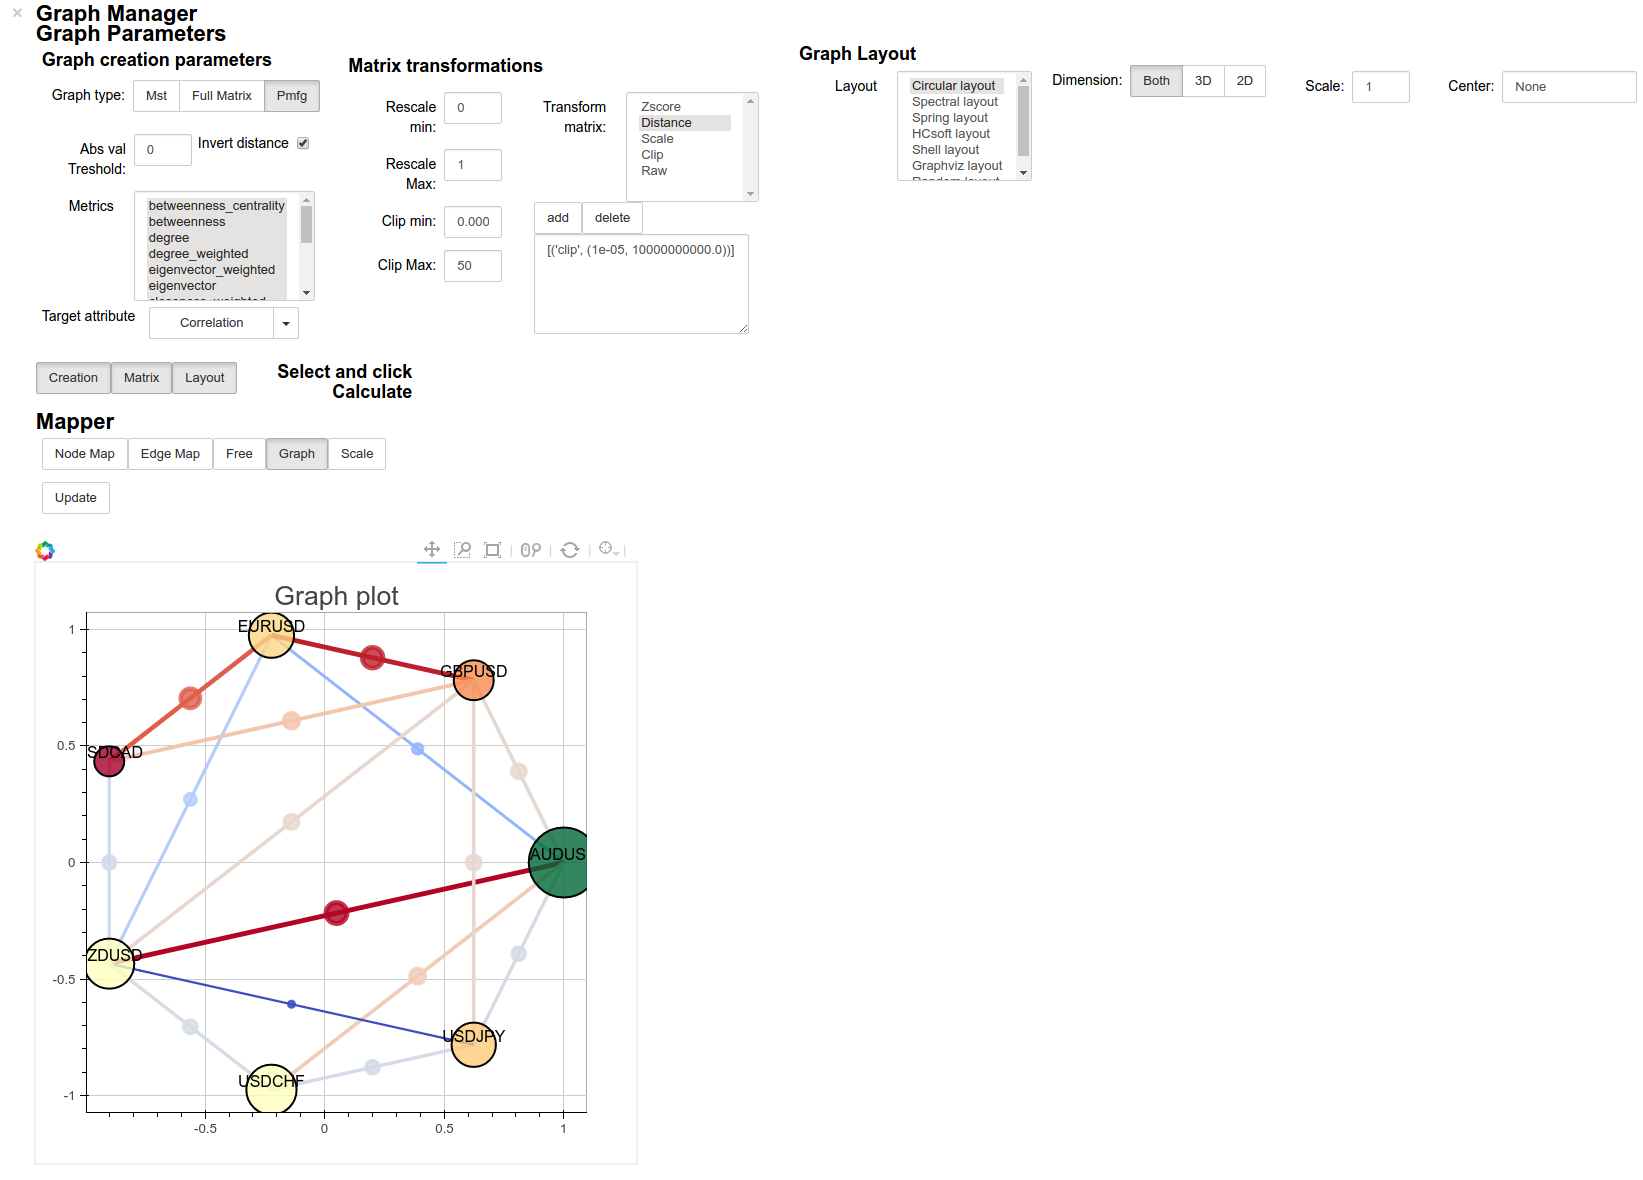

In [54]:
Image(filename='gplot_data/high_pmfg.png') 
#gp.widget

In [50]:
gp.plot.title = 'Higher PMFG'
high_pmfg_div = notebook_div(gp.plot) #save this plot

## Comparing PMFGs and dispalying them as a widget

Now we will compare both PMFG with the original graph to see how the filtered acted on our original matrix. 

To achieve this the lower values graph will be calculated the same way as before but unchecking de *invert distance* checkbox.

We will also uncheck the line_width mapping and change the free line_width param to 4.

In [71]:
#gp.widget
gp.plot.title = 'Lower PMFG'
low_pmfg_div = notebook_div(gp.plot)

In [42]:
import ipywidgets as widgets

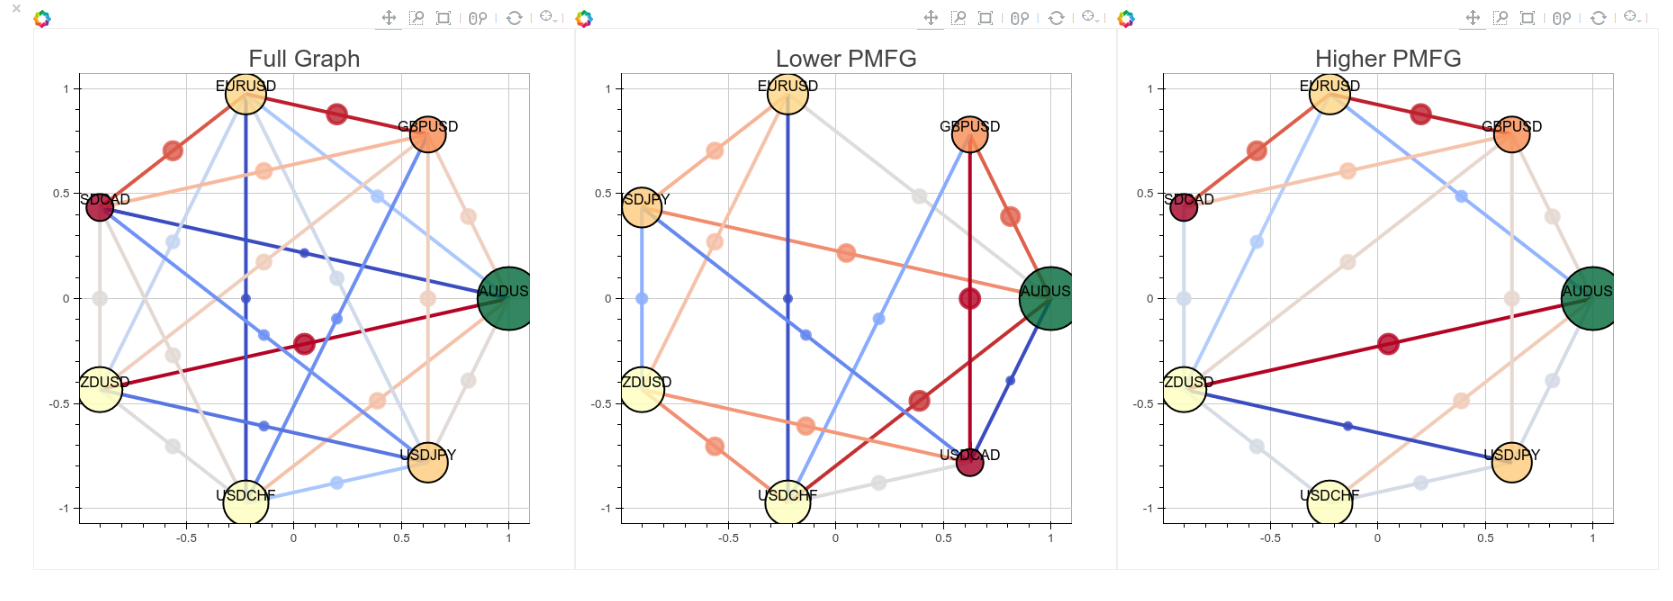

In [75]:
full_html = widgets.HTML(value=full_div)
low_pmfg_html = widgets.HTML(value=low_pmfg_div)
high_pmfg_html = widgets.HTML(value=high_pmfg_div)
pmfg_box = widgets.HBox(children=[full_html,low_pmfg_html,high_pmfg_html])
Image(filename='gplot_data/pmfg_box.png') 
#pmfg_box

## Minimum Spanning tree representations

We will do the same thing with the MST representation. Lets calculate the highier MST and the lower MST

In [76]:
#gp.widget

In [70]:
gp.plot.title = 'Lower MST'
low_MST_div = notebook_div(gp.plot)

In [72]:
gp.plot.title = 'Higher MST'
high_MST_div = notebook_div(gp.plot)

## Changing the visual mapping

We will create another full graph representation of our dataset. This alternative version will have the following mapping:

- **Node size**: Shannon entropy
- **Node color**: Total returns.
- **Edge mapping**: Covariance.

In [73]:
gp.plot.title = 'Full version 2'
full_v2_div = notebook_div(gp.plot)

### Displaying everything as a widget

Now we only have to copy-paste the pmfg widget,change a few letters and our plots are ready to be displayed!

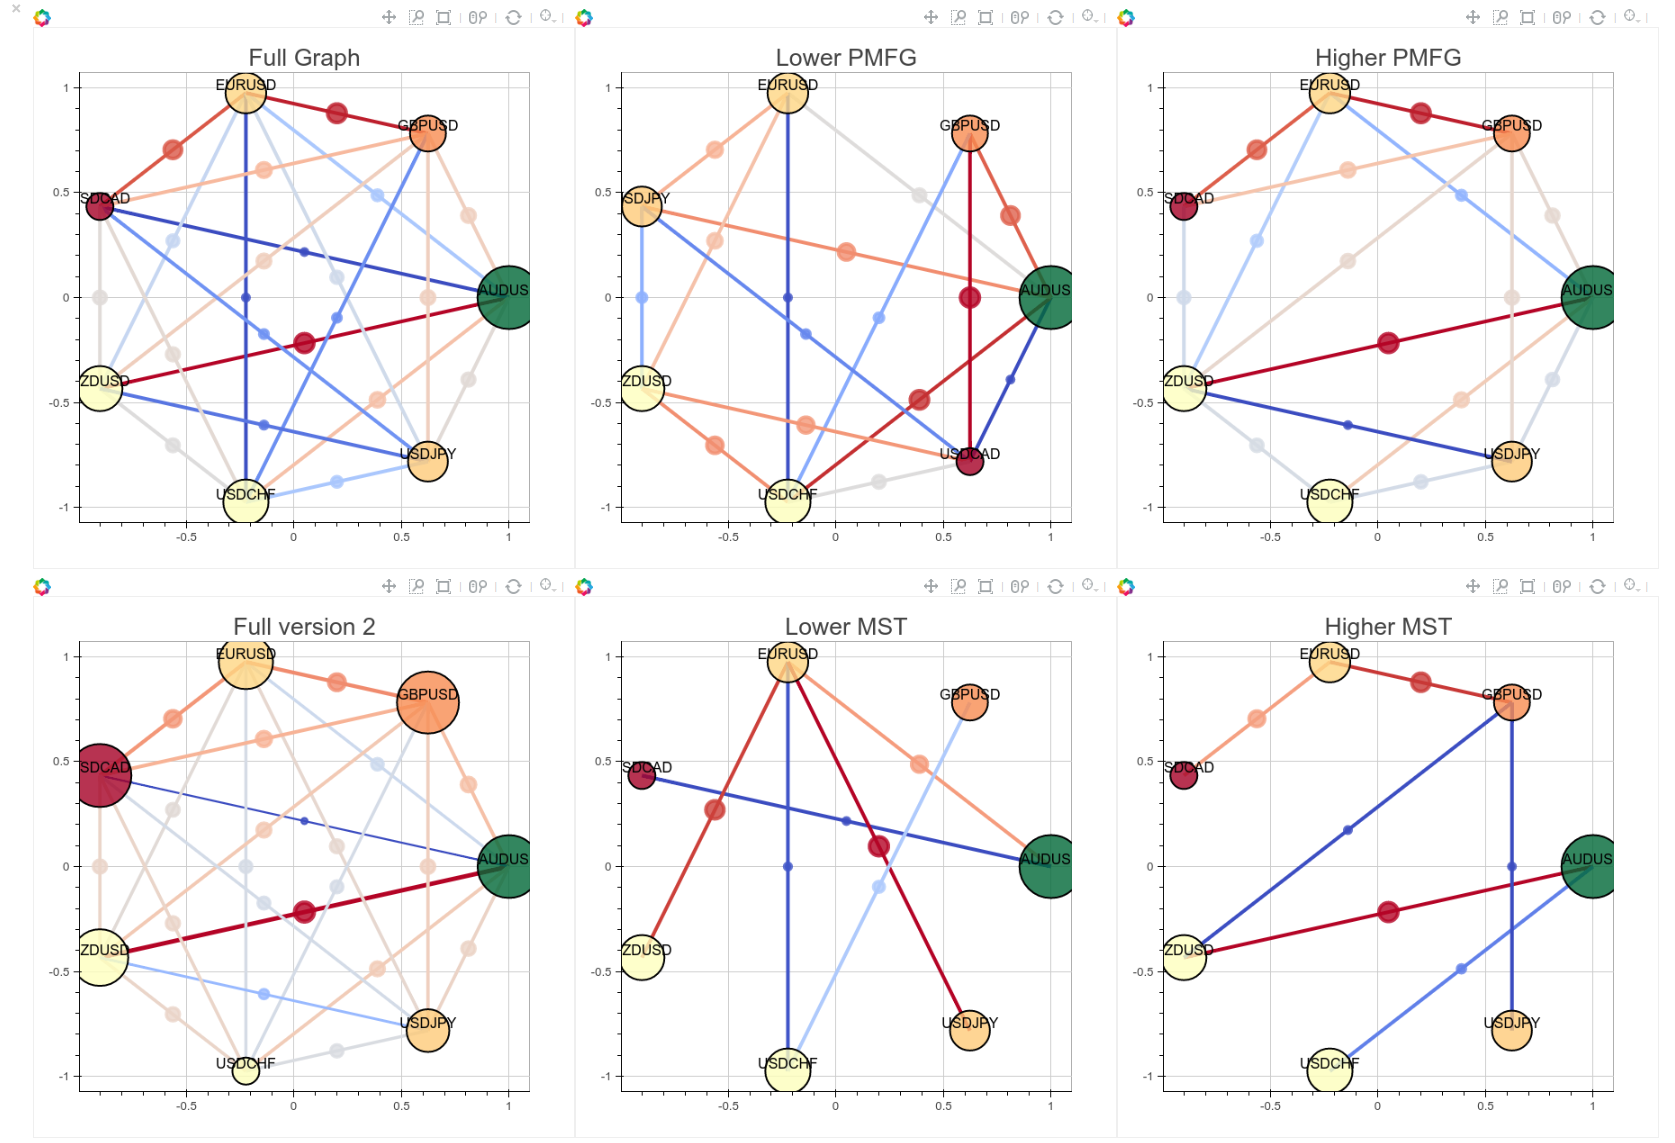

In [78]:
full_v2_html = widgets.HTML(value=full_v2_div)
low_mst_html = widgets.HTML(value=low_MST_div)
high_mst_html = widgets.HTML(value=high_MST_div)
mst_box = widgets.HBox(children=[full_v2_html,low_mst_html,high_mst_html])
full_box = widgets.VBox(children=[pmfg_box,mst_box])
Image(filename='gplot_data/full_plot.png') 
#full_box